#### Pegando os dados e analisando

In [10]:
import pandas as pd

bitcoin = pd.read_csv('./data/BTC-USD.csv')
bitcoin = bitcoin.iloc[2:,:]
bitcoin

,Price,Close,High,Low,Open,Volume
2,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
5,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
6,2014-09-21,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100
...,...,...,...,...,...,...
3996,2025-08-24,113458.4296875,115615.0859375,111060.546875,115387.390625,73961489632
3997,2025-08-25,110124.3515625,113637.84375,109324.28125,113456.8984375,85706860190
3998,2025-08-26,111802.65625,112397.015625,108762.0390625,110124.1015625,69396320317
3999,2025-08-27,111222.0625,112619.4140625,110398.265625,111795.7109375,62137056409


In [11]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 2 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   3999 non-null   object
 1   Close   3999 non-null   object
 2   High    3999 non-null   object
 3   Low     3999 non-null   object
 4   Open    3999 non-null   object
 5   Volume  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [12]:
cols = ['Close', 'High', 'Low', 'Open', 'Volume']
bitcoin[cols] = bitcoin[cols].apply(pd.to_numeric, errors='coerce')

In [13]:
bitcoin.dtypes

Price      object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [14]:
bitcoin.head(15)

,Price,Close,High,Low,Open,Volume
2,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
3,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
4,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
5,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
6,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
7,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
8,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
9,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
10,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400
11,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800


In [15]:
bitcoin.isna().sum()

Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [16]:
bitcoin.describe()

,Close,High,Low,Open,Volume
count,3999.000000,3999.000000,3999.000000,3999.000000,3.999000e+03
mean,24461.123600,24944.307060,23901.912237,24434.644163,2.044081e+10
std,28993.518298,29491.915939,28417.311016,28964.864337,2.179028e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2454.109985,2535.934937,2327.180054,2441.319946,1.022930e+09
50%,10233.599609,10422.133789,9945.110352,10211.550781,1.640894e+10
75%,38740.271484,39791.955078,37615.025391,38743.265625,3.185062e+10
max,123344.062500,124457.117188,118959.195312,123339.398438,3.509679e+11


In [17]:
# Calculando a mediana para todos os atributos
bitcoin.median(numeric_only=True)

Close     1.023360e+04
High      1.042213e+04
Low       9.945110e+03
Open      1.021155e+04
Volume    1.640894e+10
dtype: float64

In [18]:
# Calculando a variância para todos os atributos
bitcoin.var(numeric_only=True)

Close     8.406241e+08
High      8.697731e+08
Low       8.075436e+08
Open      8.389634e+08
Volume    4.748163e+20
dtype: float64

In [19]:
# Calculando a correlação
bitcoin.corr(numeric_only=True)

,Close,High,Low,Open,Volume
Close,1.000000,0.999711,0.999633,0.999335,0.685999
High,0.999711,1.000000,0.999413,0.999674,0.691872
Low,0.999633,0.999413,1.000000,0.999553,0.678090
Open,0.999335,0.999674,0.999553,1.000000,0.686171
Volume,0.685999,0.691872,0.678090,0.686171,1.000000


<Axes: >

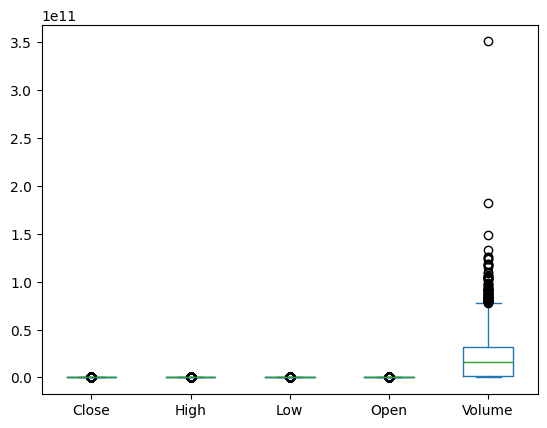

In [20]:
import matplotlib.pyplot as plt
bitcoin.plot(kind='box')

In [22]:
bitcoin[bitcoin.duplicated() == True]

,Price,Close,High,Low,Open,Volume
